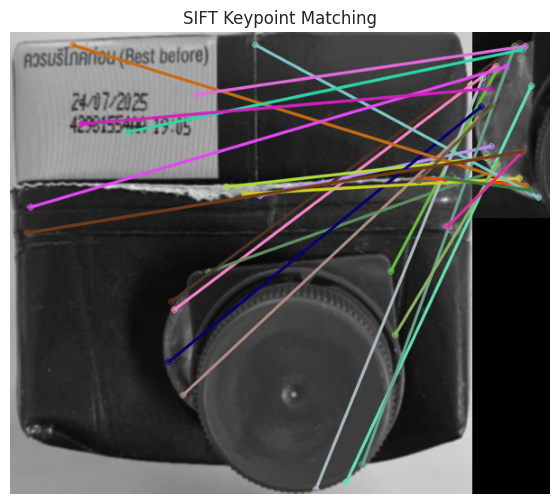

Number of matches: 24


In [54]:
import cv2
import matplotlib.pyplot as plt

# Load the two images
image1_path = "../data/large/ng_image.jpg"  # Replace with first image path
image2_path = "../data/large/defected_model.jpg"  # Replace with second image path

image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Validate both images
if image1 is None or image2 is None:
    raise ValueError("Error: Unable to load one or both images. Check file paths.")

# # convert to binary
# _, image1 = cv2.threshold(image1, 70, 255, cv2.THRESH_BINARY)
# _, image2 = cv2.threshold(image2, 70, 255, cv2.THRESH_BINARY)

# Resize the images to the same size
image1 = cv2.resize(image1, (512, 512))
image2 = cv2.resize(image2, (512, 512))[512//2:512-50, 512//3:512//2]

# Blur the images
image1 = cv2.GaussianBlur(image1, (5, 5), 0)
image2 = cv2.GaussianBlur(image2, (5, 5), 0)

# Step 1: Initialize SIFT detector
sift = cv2.SIFT_create()

# Step 2: Detect and compute keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Step 3: Use BFMatcher to match keypoints
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Step 4: Draw the top matches
matched_image = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, matches[:50], None,
    matchesThickness=2, flags=10
)


# #feature matching
# bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# matches = bf.match(descriptors_1,descriptors_2)
# matches = sorted(matches, key = lambda x:x.distance)

# img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

# Display the matched image
plt.figure(figsize=(12, 6))
plt.imshow(matched_image, cmap="gray")
plt.title("SIFT Keypoint Matching")
plt.axis("off")
plt.show()

# Output the number of matches
print(f"Number of matches: {len(matches)}")


Histogram similarity: 0.7938553191272989


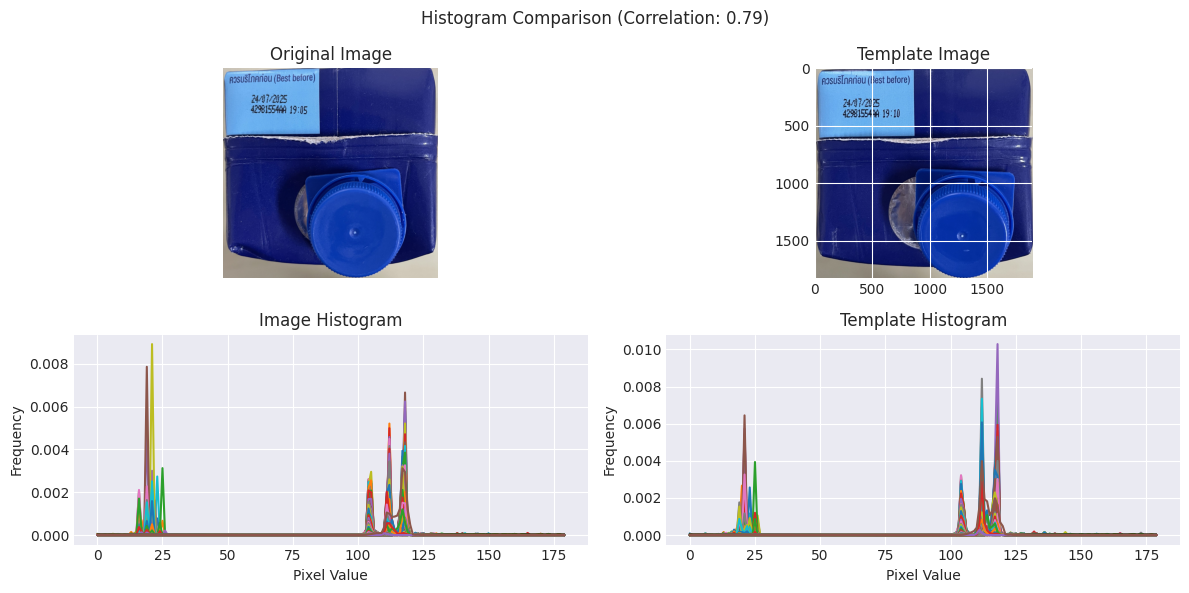

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and the template
image = cv2.imread("../data/large/ng_image.jpg")
template = cv2.imread('../data/large/defected_model.jpg')

# Convert images to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_template = cv2.cvtColor(template, cv2.COLOR_BGR2HSV)

# Apply histogram equalization to the Value (V) channel
hsv_image[:, :, 2] = cv2.equalizeHist(hsv_image[:, :, 2])
hsv_template[:, :, 2] = cv2.equalizeHist(hsv_template[:, :, 2])

# Convert back to BGR color space after histogram equalization
image_eq = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
template_eq = cv2.cvtColor(hsv_template, cv2.COLOR_HSV2BGR)

# Calculate histograms in the HSV color space
hist_image = cv2.calcHist([hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256])
hist_template = cv2.calcHist([hsv_template], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Normalize histograms
hist_image /= hist_image.sum()
hist_template /= hist_template.sum()

# Compare histograms using correlation
similarity = cv2.compareHist(hist_image, hist_template, cv2.HISTCMP_CORREL)
print(f"Histogram similarity: {similarity}")

# Visualize the histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image[:, :, ::-1])
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(template[:, :, ::-1])
plt.title("Template Image")

plt.subplot(2, 2, 3)
plt.plot(hist_image)
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.plot(hist_template)
plt.title("Template Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.suptitle(f"Histogram Comparison (Correlation: {similarity:.2f})")
plt.tight_layout()
plt.show()


In [56]:
def histogramize(image):
    # Convert images to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # hsv_template = cv2.cvtColor(template, cv2.COLOR_BGR2HSV)

    # Apply histogram equalization to the Value (V) channel
    hsv_image[:, :, 2] = cv2.equalizeHist(hsv_image[:, :, 2])
    # hsv_template[:, :, 2] = cv2.equalizeHist(hsv_template[:, :, 2])

    # # Convert back to BGR color space after histogram equalization
    # image_eq = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    # template_eq = cv2.cvtColor(hsv_template, cv2.COLOR_HSV2BGR)

    # Calculate histograms in the HSV color space
    hist_image = cv2.calcHist([hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256])
    # hist_template = cv2.calcHist([hsv_template], [0, 1], None, [180, 256], [0, 180, 0, 256])

    # Normalize histograms
    hist_image /= hist_image.sum()
    # hist_template /= hist_template.sum()
    return hist_image

OK Histogram similarity: 0.24725988842216348
NG Histogram similarity: 0.7938553191272989


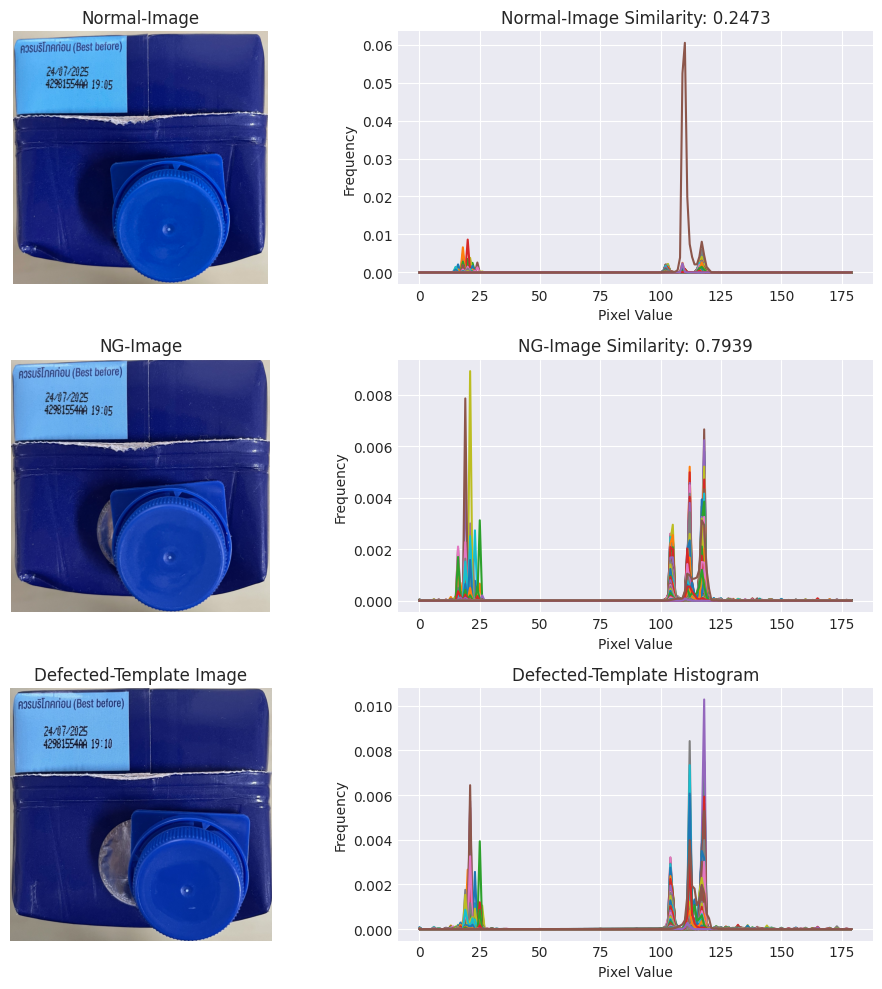

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')

# Load the image and the template
ok_image = cv2.imread("../data/large/ok_image.png")
ng_image = cv2.imread("../data/large/ng_image.jpg")
template = cv2.imread('../data/large/defected_model.jpg')

hist_ok_image = histogramize(ok_image)
hist_ng_image = histogramize(ng_image)
hist_template = histogramize(template)


# Compare histograms using correlation
similarity_ok = cv2.compareHist(hist_ok_image, hist_template, cv2.HISTCMP_CORREL)
similarity_ng = cv2.compareHist(hist_ng_image, hist_template, cv2.HISTCMP_CORREL)

print(f"OK Histogram similarity: {similarity_ok}")
print(f"NG Histogram similarity: {similarity_ng}")


# Visualize the histograms
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.imshow(ok_image[:, :, ::-1])
plt.title("Normal-Image")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.plot(hist_ok_image)
# plt.title(f"Normal-Image Similarity: {similarity_ok:.4f}")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
plt.imshow(ng_image[:, :, ::-1])
plt.title("NG-Image")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.plot(hist_ng_image)
# plt.title(f"NG-Image Similarity: {similarity_ng:.4f}")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(3, 2, 5)
plt.imshow(template[:, :, ::-1])
plt.title("Defected-Template Image")
plt.axis("off")

plt.subplot(3, 2, 6)
plt.plot(hist_template)
plt.title("Defected-Template Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


OK Histogram similarity: 0.24725988842216348
NG Histogram similarity: 0.7938553191272989


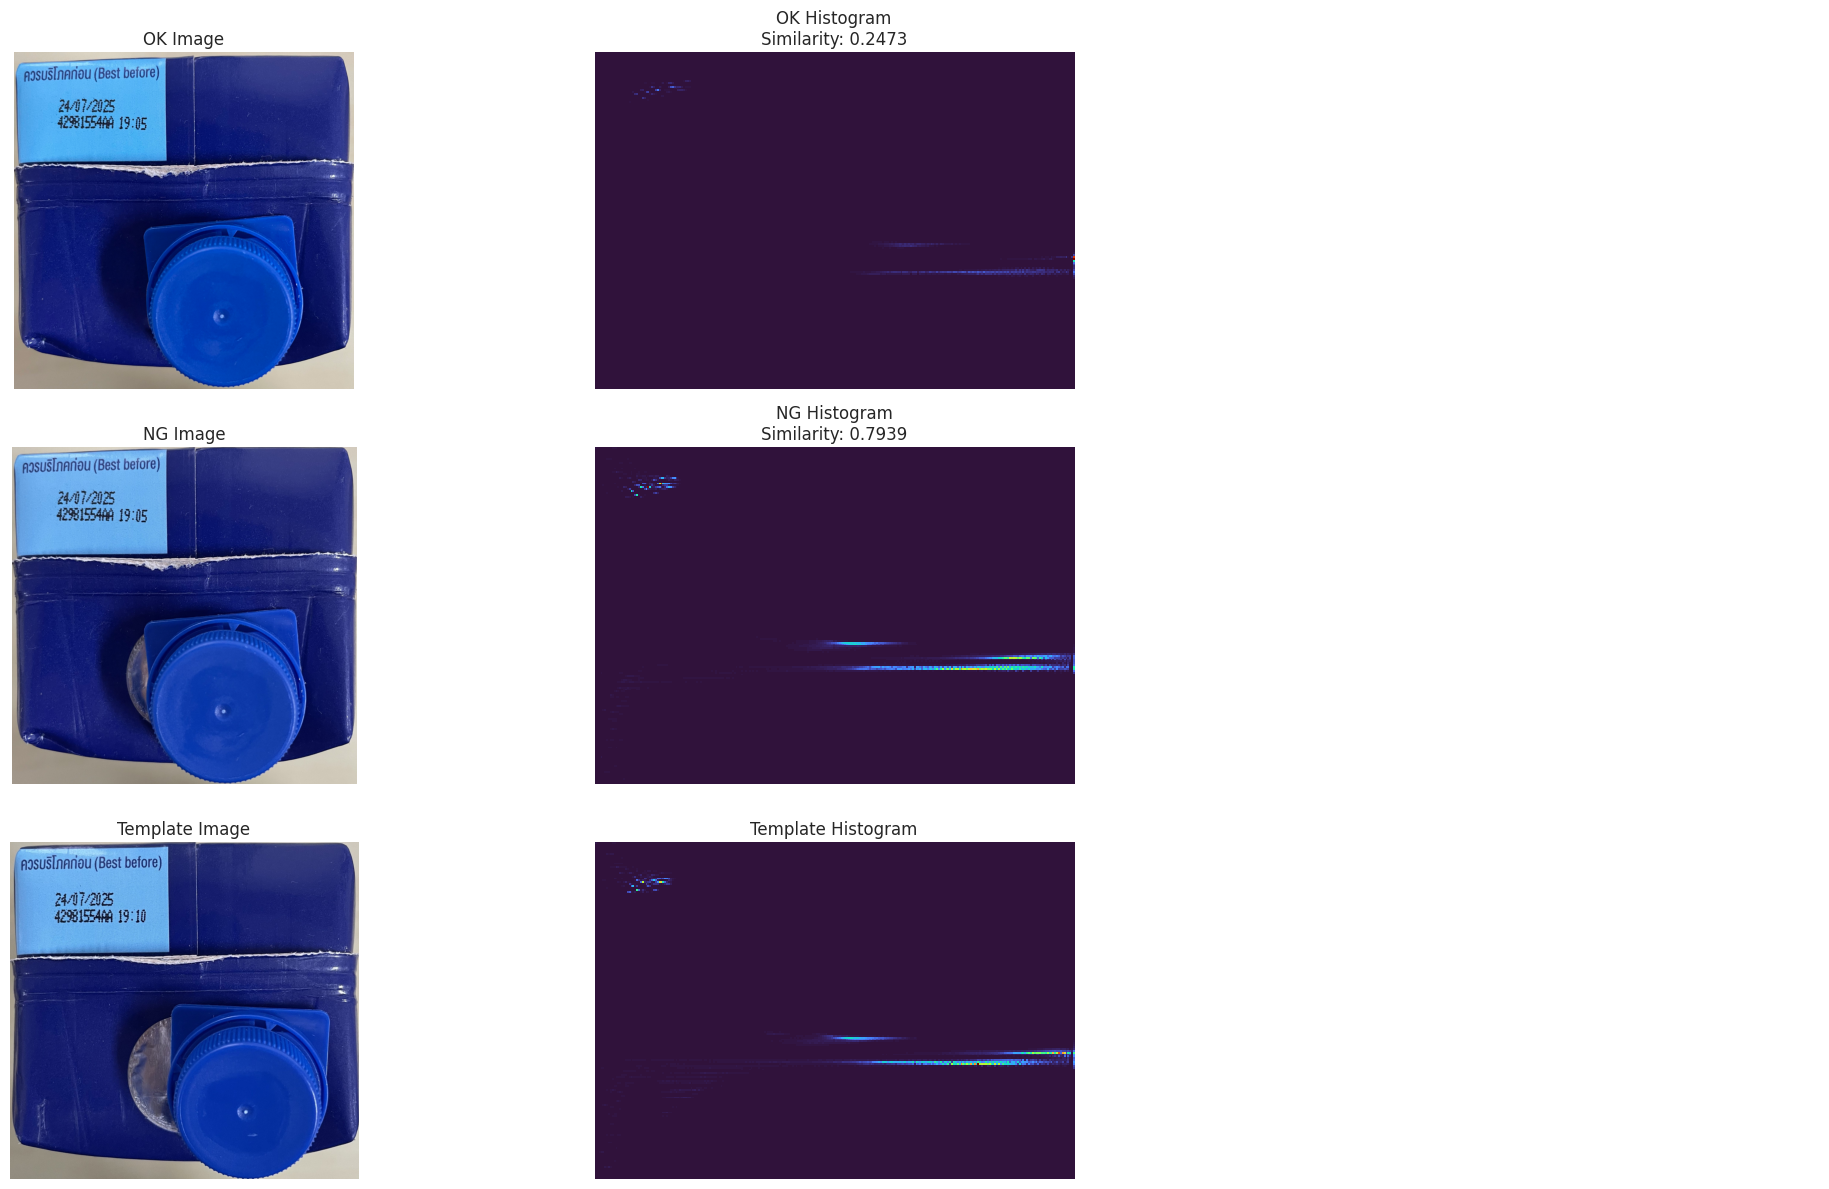

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histogramize(image):
    """Generate normalized HSV histogram for the input image."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_image[:, :, 2] = cv2.equalizeHist(hsv_image[:, :, 2])
    hist_image = cv2.calcHist([hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256])
    hist_image /= hist_image.sum()  # Normalize the histogram
    return hist_image


def plot_images_and_histograms(ok_image, ng_image, template, hist_ok, hist_ng, hist_template, sim_ok, sim_ng):
    """Plot original images, histograms, and correlation values."""
    fig, axes = plt.subplots(3, 3, figsize=(20, 12), dpi=100)

    # Row 1: OK Image
    axes[0, 0].imshow(cv2.cvtColor(ok_image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title("OK Image")
    axes[0, 0].axis('off')
    axes[0, 1].imshow(hist_ok, interpolation='nearest', cmap='turbo')
    axes[0, 1].set_title(f"OK Histogram\nSimilarity: {sim_ok:.4f}")
    axes[0, 1].axis('off')
    axes[0, 2].axis('off')  # Placeholder

    # Row 2: NG Image
    axes[1, 0].imshow(cv2.cvtColor(ng_image, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title("NG Image")
    axes[1, 0].axis('off')
    axes[1, 1].imshow(hist_ng, interpolation='nearest', cmap='turbo')
    axes[1, 1].set_title(f"NG Histogram\nSimilarity: {sim_ng:.4f}")
    axes[1, 1].axis('off')
    axes[1, 2].axis('off')  # Placeholder

    # Row 3: Template
    axes[2, 0].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
    axes[2, 0].set_title("Template Image")
    axes[2, 0].axis('off')
    axes[2, 1].imshow(hist_template, interpolation='nearest', cmap='turbo')
    axes[2, 1].set_title("Template Histogram")
    axes[2, 1].axis('off')
    axes[2, 2].axis('off')  # Placeholder

    # Adjust layout
    plt.tight_layout()
    plt.show()


# Load the images
ok_image = cv2.imread("../data/large/ok_image.png")
ng_image = cv2.imread("../data/large/ng_image.jpg")
template = cv2.imread('../data/large/defected_model.jpg')

# Calculate histograms
hist_ok_image = histogramize(ok_image)
hist_ng_image = histogramize(ng_image)
hist_template = histogramize(template)

# Compare histograms using correlation
similarity_ok = cv2.compareHist(hist_ok_image, hist_template, cv2.HISTCMP_CORREL)
similarity_ng = cv2.compareHist(hist_ng_image, hist_template, cv2.HISTCMP_CORREL)

# Print similarities
print(f"OK Histogram similarity: {similarity_ok}")
print(f"NG Histogram similarity: {similarity_ng}")

# Plot original images, histograms, and similarities
plot_images_and_histograms(ok_image, ng_image, template,
                           hist_ok_image, hist_ng_image, hist_template,
                           similarity_ok, similarity_ng)
